In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Getting the dataset utilized for the manual linear regression creation
np.random.seed(7)

# 20 sample data points
coffee_cups = np.random.randint(0, 10, 20)              # cups of coffee per day (0–9)
productivity = 5 * coffee_cups + np.random.normal(0, 5, 20)  # roughly linear + noise

# Create DataFrame
df = pd.DataFrame({
    "Coffee_Cups": coffee_cups,
    "Productivity": productivity
})

print(df.head())

   Coffee_Cups  Productivity
0            4     19.925159
1            9     45.106953
2            6     33.743905
3            3     14.584321
4            3     15.353646


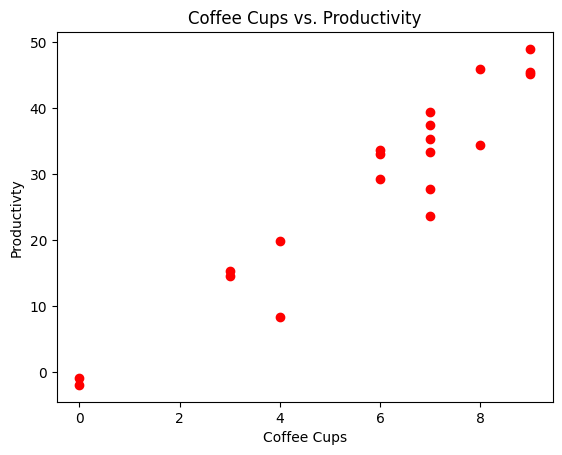

In [3]:
# Same visualization of created data
plt.scatter(coffee_cups, productivity, color="red")
plt.xlabel("Coffee Cups")
plt.ylabel("Productivty")
plt.title("Coffee Cups vs. Productivity")
plt.show()

In [4]:
# Same split of the data
X_train, X_test, y_train, y_test = train_test_split(coffee_cups, productivity, test_size=0.2, random_state=7)
print("The split data is as follows:")
print("X's training set is:", X_train)
print("y's training set is:", y_train)
print("X's test set is:", X_test)
print("y's test set is:", y_test)

The split data is as follows:
X's training set is: [8 4 7 7 6 6 9 4 7 7 8 7 9 3 3 0]
y's training set is: [45.88331523 19.92515896 37.38507901 39.36946903 29.21590692 33.00006921
 48.97092262  8.35578454 35.35330311 23.74832636 34.46441314 27.82337021
 45.51786973 14.58432084 15.35364571 -0.8425633 ]
X's test set is: [9 0 6 7]
y's test set is: [45.10695337 -1.89602238 33.74390538 33.32899893]


In [16]:
# Make dataframes 2D and fit the model on that training data
X_plot_training = X_train.reshape(-1, 1)
y_plot_training = y_train.reshape(-1, 1)

model = LinearRegression()
model.fit(X_plot_training, y_plot_training)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


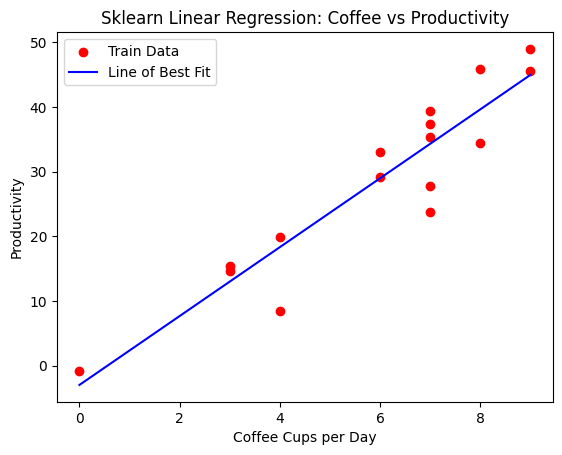

In [22]:
# Creating the line of best fit and plotting that along with training data
X_train_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_train_line = model.predict(X_train_line)
plt.scatter(X_train, y_train, label="Train Data", color="red")
plt.plot(X_train_line, y_train_line, label="Line of Best Fit", color="blue")

# Graph to show
plt.xlabel("Coffee Cups per Day")
plt.ylabel("Productivity")
plt.title("Sklearn Linear Regression: Coffee vs Productivity")
plt.legend()
plt.show()

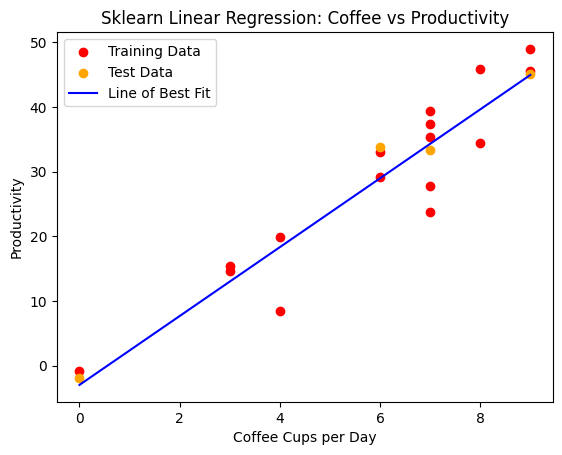

In [25]:
# Again we can add in the test data now
plt.scatter(X_train, y_train, color="red", label="Training Data")
plt.scatter(X_test, y_test, label="Test Data", color="orange")
plt.plot(X_train_line, y_train_line, color="blue", label="Line of Best Fit")
plt.xlabel("Coffee Cups per Day")
plt.ylabel("Productivity")
plt.title("Sklearn Linear Regression: Coffee vs Productivity")
plt.legend()
plt.show()

In [ ]:
# Calculating r^2 on test data with sklearn
y_predict_df = X_test.reshape(-1, 1)
y_predict = model.predict(y_predict_df)
r_2 = r2_score(y_test, y_predict)
print(r_2)
print("As we can see, the r^2 is the same as the manual test and still tells us the data fits very well")

0.9799392878509191
As we can see, the r^2 is the same as the manual test and still tells us the data fits very well


In [34]:
# Calculating MSE on test data with sklearn
mse = mean_squared_error(y_test, y_predict)
print(mse)
print("Again the mean squared error stays the same as manual calculation and we can see predictions are close to the actual values")

6.254300048221581
Again the mean squared error stays the same as manual calculation and we can see predictions are close to the actual values
